In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('./genres.csv')
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [3]:
# clean any empty values
df = df.dropna()

# get rid of cols not needed
df = df.drop(columns=['$Domestic', 'Domestic%', '$Foreign', 'Foreign%', 'Rating', 'Vote_Count', 'Production_Countries', 'Original_Language'], errors='ignore')
df.head()

,Rank,Release Group,$Worldwide,Domestic %,Foreign %,Year,Genres
0,1,Mission: Impossible II,546388108.0,39.4,60.6,2000,"Adventure, Action, Thriller"
1,2,Gladiator,460583960.0,40.8,59.2,2000,"Action, Drama, Adventure"
2,3,Cast Away,429632142.0,54.4,45.6,2000,"Adventure, Drama"
3,4,What Women Want,374111707.0,48.9,51.1,2000,"Comedy, Romance"
4,5,Dinosaur,349822765.0,39.4,60.6,2000,"Animation, Family, Adventure"


In [4]:
# splitting the genres of each movie into a seperate column and add it to the dataframe
genres = df['Genres'].str.split(',', expand=True)
df['Genre1'] = genres[0]
df = df.drop(columns=['Genres'], errors='ignore')
df.head()

,Rank,Release Group,$Worldwide,Domestic %,Foreign %,Year,Genre1
0,1,Mission: Impossible II,546388108.0,39.4,60.6,2000,Adventure
1,2,Gladiator,460583960.0,40.8,59.2,2000,Action
2,3,Cast Away,429632142.0,54.4,45.6,2000,Adventure
3,4,What Women Want,374111707.0,48.9,51.1,2000,Comedy
4,5,Dinosaur,349822765.0,39.4,60.6,2000,Animation


In [5]:
# counting the number of movies in each genre
genre_counts = df['Genre1'].value_counts()
df_genre = pd.DataFrame(genre_counts)
print(genre_counts)

Comedy             1056
Drama               956
Action              796
Animation           333
Horror              285
Adventure           276
Crime               187
Thriller            156
Romance             153
Family              141
Fantasy             113
Science Fiction     104
Mystery              64
Documentary          51
History              43
War                  41
Music                34
Western               8
Name: Genre1, dtype: int64


<Figure size 1000x1000 with 0 Axes>

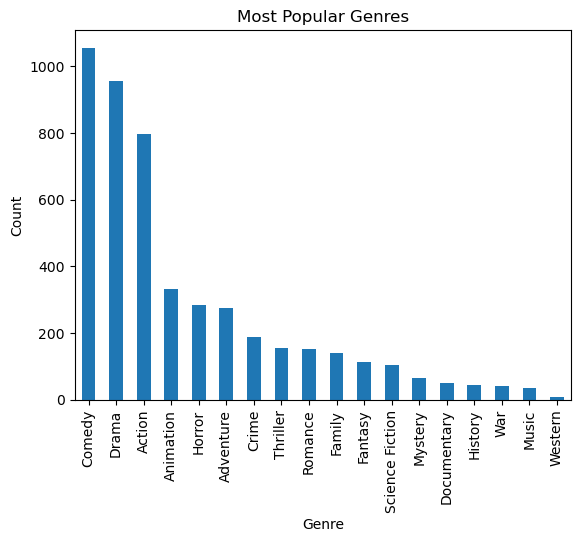

In [6]:
# Plotting the most popular genres
plt.figure(figsize=(10, 10))
df_genre.plot(kind='bar', legend=False)
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [7]:
# counting the revenue of each genre
genre_revenue = df.groupby('Genre1')['$Worldwide'].sum()
df_genre_revenue = pd.DataFrame(genre_revenue)
df_genre_revenue

,$Worldwide
Genre1,
Action,1.436610e+11
Adventure,7.848873e+10
Animation,5.969107e+10
Comedy,7.949243e+10
Crime,1.426292e+10
Documentary,2.201981e+09
Drama,7.152476e+10
Family,2.162687e+10
Fantasy,2.149294e+10


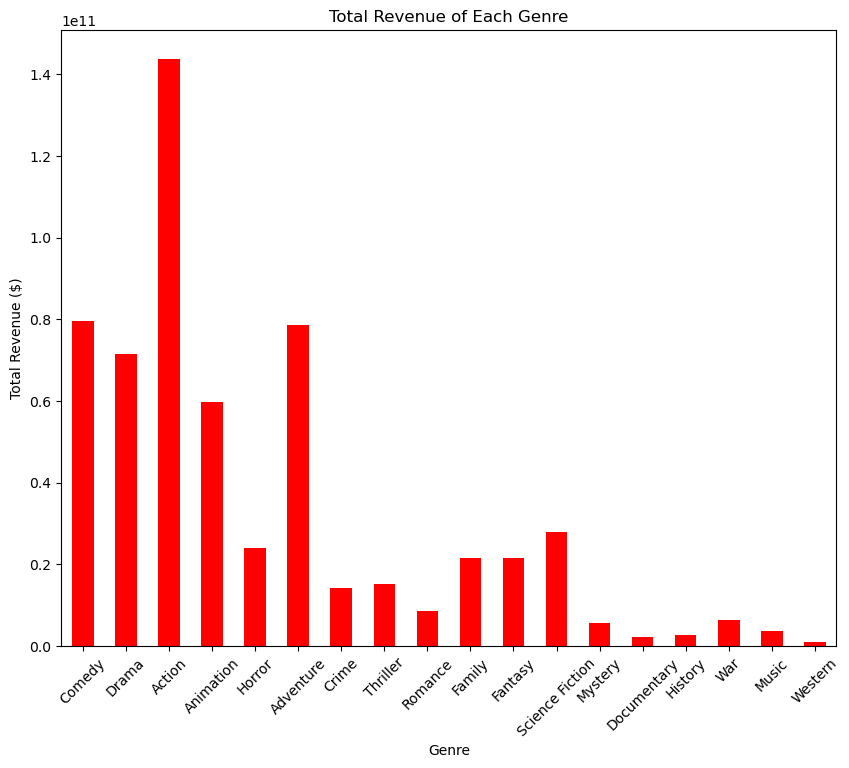

In [8]:
# Merge the dataframes on the genre index
df_merged = df_genre.merge(df_genre_revenue, left_index=True, right_index=True)

# Plotting the total revenue of each genre
plt.figure(figsize=(10, 8))
df_merged['$Worldwide'].plot(kind='bar', color='red')
plt.title('Total Revenue of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

In [9]:
# conducting ANOVA test
anova_result = stats.f_oneway(
    *[df[df['Genre1'] == genre]['$Worldwide'] for genre in df['Genre1'].unique() if genre in df['Genre1'].unique()]
)
print('ANOVA test result:', anova_result)

ANOVA test result: F_onewayResult(statistic=32.3222159094857, pvalue=7.337944927440706e-100)
